# **Travelling Salesman Problem using Quantum Phase Estimation**
---

### **Table of Contents**
---

1. [Little Backstory](#backstory)<br>
2. [Introduction](#introduction)<br>
   2.1 [What is Travelling Salesman Problem](#tsp_definition)<br>
   2.2 [Time Complexity](#time_complexity)<br>
   2.3 [Brute Force Idea](#bf_idea)<br>
   2.4 [Importantness](#important)<br>
   2.5 [Quantum Computer Approach](#q_approach)<br>
3. [Approach](#approach)<br>
4. [General Strategy](#general_strategy)<br>
   4.1 [Unitary Matrix](#unitary_matrix)<br>
   4.2 [Eigenstates](#eigenstates)<br>
5. [Building the components](#components)<br>
   5.1 [Unitaries](#unitaries)<br>
6. [Circuit](#circuit)<br>
   6.1 [QASM Simulator](#qasm_simulator)<br>
   6.2 [Statevector Simulator](#statevector_simulator)<br>
7. [Conclusion](#conclusion)<br>
8. [Appendix](#appendix)<br>
9. [References](#references)<br>
10. [Version Information](#version_information)

### **Little Backstory** <a id="backstory"></a>

---
The concept which came to life dated back after the invention of **Turing Machine**, is the concept of **computability** and **decidability**. This gives rise to the category of **problems** of **decidable** and **undecidable**. There are thousands of computational problems in the world. Out of these problems, some problems can be **solved** by classical computer in **polynomial time**, while others cannot be **solved** in **polynomial time**, they can be **verified** in **polynomial time**. This gives rise to the category of **complexity class** of **P** and **NP**. **Travelling Salesman Problem** belongs to the **complexity class** of **NP** and **problem** of **intractable decidable**. It also falls under **optimization problem** which is kind of subset of **decision** problem.

### **Introduction** <a id="introduction"></a>

---

### What is Travelling Salesman Problem ?  <a id="tsp_definition"></a>
> Travelling Salesman Problem belongs to class of **NP-Hard** problem in **combinatorial optimization**. The problem states as follows:-
> > **Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?**

> And the Hamiltonian cycle says:-
> > **The cycle of visiting each vertex once in a graph, and returning to the starting vertex is known as a Hamiltonian cycle**.

> > **NOTE**: Finding all the Hamiltonian cycle in a graph is a **NP-Hard** problem. **Hamiltonian cycle** can be converted to Travelling Salesman Problem.

> This looks a lot similar to the **TSP**. Actually, Hamiltonian cycle is the **heart** of TSP. Thats why these 2 problem is interconnected and solving one will solve the other.

### What is the time complexity of it ? <a id="time_complexity"></a>
> Multiple techniques used to solve this problem till now-
> > **1. Normal Brute Force Method**: Finding all the possible combination of all the vertex.
$$
                                    O(n\ !)\ where\ n\ =\ Number\ of\ vertex/nodes\ of\ the\ graph 
$$

> > **2. Dynamic Programming**: Break the problem into smaller problem, compute those smaller problem and whenever needed use the result of those small problem, instead of computing same chunk over and over.
$$
                                    O(n^22^n)\ where\ n\ =\ Number\ of\ vertex/nodes\ of\ the\ graph 
$$

> > **3. Branch and Bound**:  Branch and Bound refers to all the state space search methods in which we generate the childern of all the expanded nodes, before making any live node as an expanded one. In this method, we find the most promising node and expand it. The term promising node means, choosing a node that can expand and give us an optimal solution. We start from the root and expand the tree untill unless we approach an optilmal (minimum cost in case of this problem) solution.
$$
                                    O(n^22^n)\ where\ n\ =\ Number\ of\ vertex/nodes\ of\ the\ graph
$$

> > **4. Heuristic Approach**: Heuristics approach is based on providing a set of rules on optimal selection of next city to travel. But this does not give optimal solution in every case as heuristics result in approximations.


### Why brute force is not a good idea ? <a id="bf_idea"></a>
> The time complexity of TSP using brute force technique is $O(n\ !)\ where\ n\ =\ number\ of\ nodes$. Now imagine using $n\ =\ 10$, then we will get $10\ !\ =\ 36,28,00$, which has $6$ digits. Now imagine $20\ !\ =\ 24,32,90,20,08,17,66,40,000$, which has $19$ digits. Now imagine $100\ !\ =\ ....$, it has 158 digits so on. So, as the no. of nodes increases, the time complexity increases **exponentially**. So, using brute force is not an optimal way to solve TSP. 


### Why is it important ? <a id="important"></a>
> Travelling salesman problem is very important in theoretical computer science and operational research. Every scientist trying to find an algorithm which can solve it in polynomial time. The reason of this importance is not specifically TSP, but instead the class to which TSP belongs to. Its the **NP** class. If we can find an algorithm for TSP, it will open an wide range of possibilitis for the thousands of other problems which belongs to the same class.
**The travelling purchaser problem** and the **vehicle routing problem** are both generalizations of TSP.

### Why Quantum Computer is used to approach this problem instead of classical computer ? <a id="q_approach"></a>
> So, now-a-days quantum computer is being is used to approach this kinds of problem using various technique, even though we have supercomputers all over the world. Its beacuse of the fact of what a quantum computer can do over classical computer, using the wierdness of quantum mechanics and all the different property which only a quantum computer can possess/provide and using algorithm developed for quantum computer over the years. Even though after using quantum computer, it doesn't guarantee it will solve the problem. But it's a new way to aproach these kinds of class problems.
> > Some of these techniques involves-
**Quantum Heuristic Algorithm**, **Generalizing Grover Search**, **Bounded-degree Graph**, **QAOA** etc.

---

### **Approach** <a id="approach"></a>

---
Lets consider the whole problem in terms of **graphs**. The **city** are represented as a **vertex** and **cost/path** as **edge** of the graph.

* We approach the problem by **encoding** the given distances/cost between the cities as **phases**.
* Each city is connected to other cities with a specific cost associated to each connection.
* We construct unitary operators whose eigenvectors are the computational basis states and eigenvalues are various combinations of these phases.
* Then we apply phase estimation algorithm to certain eigenstates which give us all the total distances possible for all the routes.
* After obtaining the distances we can search through this information using the **quantum search algorithm** for
finding the minimum to find the least possible distance as well the route taken.
* This provides us a **quadratic speedup** over the classical brute force method for a large number of cities.

### **General Strategy** <a id="general_strategy"></a>

---

So, now that we have gone through the general approach, we got an idea what to do. So, lets explain step by step-

* Lets consider the travelling salesman problem as an **undirected complete graph**, whose vertex represent **city** and the edge represent **cost/distance**. 

> **NOTE**: Before going any further, lets consider the number of cities/nodes $n\ =\ 4$.

<img src="https://graphonline.ru/tmp/saved/dP/dPpQHbuVQbkanMVi.png">

* We encode the given distance/cost as **phases($\phi$)**.
$$
             \phi_{i\to j}\ means\ cost\ encoded\ as\ phase\ from\ city\ 'i'\ to\ city\ 'j',\ where\ i,j\ \in [1,n]
$$
Example: $\phi_{1\to 2}$ means from city/node '1' to city/node '2'. $\phi_{2\to 3}$ means from city/node '2' to city/node '3' so on.

> **NOTE**: In case of self-loop i.e $\phi_{i\to i}$ the cost is **0**. 
* The classical brute force method uses $n\ x\ n$ matrix to store the distances/cost between each pair of nodes.
$$
                               A\ =\ \begin{bmatrix}
                                \phi_{1\to 1}&\phi_{1\to 2}&\phi_{1\to 3}&\phi_{1\to 4}\\
                                \phi_{2\to 1}&\phi_{2\to 2}&\phi_{2\to 3}&\phi_{2\to 4}\\
                                \phi_{3\to 1}&\phi_{3\to 2}&\phi_{3\to 3}&\phi_{3\to 4}\\
                                \phi_{4\to 1}&\phi_{4\to 2}&\phi_{4\to 3}&\phi_{4\to 4}\\
                                \end{bmatrix}
$$
> **NOTE**: All the diagonal elements in this matrix $A$ is '0'.


But on representing this matrix as only phases-
> **First**, the matrix made of the given distances using the above procedure is **not unitary** in general which implies that the implementation and manipulation of the operator is not possible on a quantum computer. 

> **Second**, the phases will get added when we multiply them or take tensor products of states with these phases as coefficients, that is the distances will get added as phases which is required for the search.

So, we represent the matrix as-
$$
                                B\ =\ \begin{bmatrix}
                                e^{i\phi_{1\to 1}} & e^{i\phi_{1\to 2}} & e^{i\phi_{1\to 3}} & e^{i\phi_{1\to 4}}\\
                                e^{i\phi_{2\to 1}} & e^{i\phi_{2\to 2}} & e^{i\phi_{2\to 3}} & e^{i\phi_{2\to 4}}\\
                                e^{i\phi_{3\to 1}} & e^{i\phi_{3\to 2}} & e^{i\phi_{3\to 3}} & e^{i\phi_{3\to 4}}\\
                                e^{i\phi_{4\to 1}} & e^{i\phi_{4\to 2}} & e^{i\phi_{4\to 3}} & e^{i\phi_{4\to 4}}\\
                                \end{bmatrix}
$$
> **NOTE**: All the diagonal elements of this matrix $B$ is '1'.

#### **For Unitary Matrix** <a id="unitary_matrix"></a>

* Now we will construct **unitary matrix**($U$) from the matrix $B$ for each city/node for the phase estimation as-
$$
                           U_{j}\ =\ \sum_{i=1}^{n}B[j][i]\ \times\ outer\ product\ of\ all\ possible\ basis\ vectors \ where\ j,\ i\ ≥\ 0\ and\ j,\ i\ ∈\ [1, n]. 
$$
The rest of the elements in the matrix $U_{j}$ are initialized to zero. Basically, $U_{j}$ is **diagonal unitary matrix** constructed from each of the columns of matrix $B$.

Lets construct the unitaries-
    
    j = 1, 2, 3, 4

**1. $U_{1}$**:  $e^{i\phi_{1\to 1}}|00\rangle\langle00| + e^{i\phi_{2\to 1}}|01\rangle\langle01| + e^{i\phi_{3\to 1}}|10\rangle\langle10| + e^{i\phi_{4\to 1}}|11\rangle\langle11|$

> **NOTE**: In quantum computing, we can write our matrices in terms of basis vectors. One such, is that the it-flip opearator $X$ can be written as-
$$
    X\ =\ |0\rangle\langle1|\ +\ |1\rangle\langle0|\ where\ |0\rangle\ =\ \begin{bmatrix}1\\0\end{bmatrix},\ |1\rangle\ =\ \begin{bmatrix}0\\1\end{bmatrix}
$$ 
> This can sometimes be clearer than using a box matrix as we can see what different multiplications will result in:
$$
                X|1\rangle\ =\ (|0\rangle\langle1|\ +\ |1\rangle\langle0|)\ |1\rangle\ \\
                            =|0\rangle\langle1|1\rangle\ +\ |1\rangle\langle0|1\rangle\ \\
                            =|0\rangle\times1\ +\ |1\rangle\times0\ =\ |0\rangle
$$
> In fact, when we see a ket and a bra multiplied like this:
$$
                            |a\rangle\langle b|
$$
> this is called the **outer product**, which follows the rule:
$$
                 |a\rangle\langle b|\ =\ \begin{bmatrix} a_{0}b_{0}&a_{0}b_{1}&\cdots&a_{0}b_{n} \\
                                         a_{1}b_{0}&\ddots&\ddots&\vdots \\
                                         \vdots&\ddots&\ddots&\vdots \\
                                         a_{n}b_{0}&a_{n}b_{1}&\cdots&a_{n}b_{n}
                                        \end{bmatrix}
$$
> We can see this does indeed result in the X-matrix as seen above:
$$
                |0\rangle\langle1|\ +\ |1\rangle\langle0|
                =\ \begin{bmatrix}0&1\\0&0\end{bmatrix}\ +\ \begin{bmatrix}0&0\\1&0\end{bmatrix}\
                =\ \begin{bmatrix}0&1\\1&0\end{bmatrix}\
                =\ X
$$

> > **NOTE**: $U_{j}$ are **diagonal unitary matrices**. It will be $n\times n\ (here,\ 4\times4)$ matrices. And these matrics are expressed in terms of basis vectors with the phases as coefficients.

Now, lets break down $U_{1}$ part by part to see what's happening. Ultimately we have to make sure $U_{j}$ is **diagonal unitary matrix**:

> $|aa\rangle\langle aa|$, gives the position of the coefficient in the $4\times4$ matrix in the diagonal elements.
$$
|00\rangle\langle00|\ =\ (\begin{bmatrix}1\\0\end{bmatrix}\otimes\begin{bmatrix}1\\0\end{bmatrix})\ \otimes\ 
                         (\begin{bmatrix}1&0\end{bmatrix}\otimes\begin{bmatrix}1&0\end{bmatrix})
                      =\ (\begin{bmatrix}1\\0\\0\\0\end{bmatrix}\otimes\begin{bmatrix}1&0&0&0\end{bmatrix})
                      =\ \begin{bmatrix}
                          1 & 0 & 0 & 0\\ 
                          0 & 0 & 0 & 0\\ 
                          0 & 0 & 0 & 0\\
                          0 & 0 & 0 & 0
                          \end{bmatrix}
$$
Similarly,
$$
|01\rangle\langle01|\ =\ (\begin{bmatrix}1\\0\end{bmatrix}\otimes\begin{bmatrix}0\\1\end{bmatrix})\ \otimes\ 
                         (\begin{bmatrix}1&0\end{bmatrix}\otimes\begin{bmatrix}0&1\end{bmatrix})
                      =\ (\begin{bmatrix}0\\1\\0\\0\end{bmatrix}\otimes\begin{bmatrix}0&1&0&0\end{bmatrix})
                      =\ \begin{bmatrix}
                          0 & 0 & 0 & 0\\ 
                          0 & 1 & 0 & 0\\ 
                          0 & 0 & 0 & 0\\
                          0 & 0 & 0 & 0
                          \end{bmatrix}
$$
$$
|10\rangle\langle10|\ =\ (\begin{bmatrix}0\\1\end{bmatrix}\otimes\begin{bmatrix}1\\0\end{bmatrix})\ \otimes\ 
                         (\begin{bmatrix}0&1\end{bmatrix}\otimes\begin{bmatrix}1&0\end{bmatrix})
                      =\ (\begin{bmatrix}0\\0\\1\\0\end{bmatrix}\otimes\begin{bmatrix}0&0&1&0\end{bmatrix})
                      =\ \begin{bmatrix}
                          0 & 0 & 0 & 0\\ 
                          0 & 0 & 0 & 0\\ 
                          0 & 0 & 1 & 0\\
                          0 & 0 & 0 & 0
                          \end{bmatrix}
$$
$$
|11\rangle\langle11|\ =\ (\begin{bmatrix}0\\1\end{bmatrix}\otimes\begin{bmatrix}0\\1\end{bmatrix})\ \otimes\ 
                         (\begin{bmatrix}1&1\end{bmatrix}\otimes\begin{bmatrix}0&1\end{bmatrix})
                      =\ (\begin{bmatrix}0\\0\\0\\1\end{bmatrix}\otimes\begin{bmatrix}0&0&0&1\end{bmatrix})
                      =\ \begin{bmatrix}
                          0 & 0 & 0 & 0\\ 
                          0 & 0 & 0 & 0\\ 
                          0 & 0 & 0 & 0\\
                          0 & 0 & 0 & 1
                          \end{bmatrix}
$$

Now, multiply these matrices with phases as coefficients:
$$
e^{i\phi_{1\to1}}|00\rangle\langle00|\ =\ \begin{bmatrix}
                                              e^{i\phi_{1\to1}} & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}
$$
$$
e^{i\phi_{2\to1}}|01\rangle\langle01|\ =\ \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & e^{i\phi_{2\to1}} & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}
$$
$$
e^{i\phi_{3\to1}}|10\rangle\langle10|\ =\ \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & e^{i\phi_{3\to1}} & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}
$$
$$
e^{i\phi_{4\to1}}|11\rangle\langle11|\ =\ \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & e^{i\phi_{4\to1}}
                                              \end{bmatrix}
$$
Now adding them all up:
$$
U_{1}\ =\ e^{i\phi_{1\to1}}|00\rangle\langle00|\ +\ e^{i\phi_{2\to1}}|01\rangle\langle01|\ +\ e^{i\phi_{3\to1}}|10\rangle\langle10|\ +\ e^{i\phi_{4\to1}}|11\rangle\langle11|\ =\ \begin{bmatrix}
                                              e^{i\phi_{1\to1}} & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & e^{i\phi_{2\to1}} & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & e^{i\phi_{3\to1}} & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & e^{i\phi_{4\to1}}
                                              \end{bmatrix}\ =\ 
                                              \begin{bmatrix}
                                              e^{i\phi_{1\to1}} & 0 & 0 & 0\\ 
                                              0 & e^{i\phi_{2\to1}} & 0 & 0\\ 
                                              0 & 0 & e^{i\phi_{3\to1}} & 0\\
                                              0 & 0 & 0 & e^{i\phi_{4\to1}}
                                              \end{bmatrix}
$$

In similar way, we have to find $U_{2},\ U_{3},\ U_{4}$-

**2. $U_{2}$**: $e^{i\phi_{1\to 2}}|00\rangle\langle00| + e^{i\phi_{2\to 2}}|01\rangle\langle01| + e^{i\phi_{3\to 2}}|10\rangle\langle10| + e^{i\phi_{4\to 2}}|11\rangle\langle11|$
$$
                            \begin{bmatrix}
                                              e^{i\phi_{1\to2}} & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & e^{i\phi_{2\to2}} & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & e^{i\phi_{3\to2}} & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & e^{i\phi_{4\to2}}
                                              \end{bmatrix}\ =\ 
                                              \begin{bmatrix}
                                              e^{i\phi_{1\to2}} & 0 & 0 & 0\\ 
                                              0 & e^{i\phi_{2\to2}} & 0 & 0\\ 
                                              0 & 0 & e^{i\phi_{3\to2}} & 0\\
                                              0 & 0 & 0 & e^{i\phi_{4\to2}}
                                              \end{bmatrix}
$$

**3. $U_{3}$**: $e^{i\phi_{1\to 3}}|00\rangle\langle00| + e^{i\phi_{2\to 3}}|01\rangle\langle01| + e^{i\phi_{3\to 3}}|10\rangle\langle10| + e^{i\phi_{4\to 3}}|11\rangle\langle11|$
$$
                            \begin{bmatrix}
                                              e^{i\phi_{1\to3}} & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & e^{i\phi_{2\to3}} & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & e^{i\phi_{3\to3}} & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & e^{i\phi_{4\to3}}
                                              \end{bmatrix}\ =\ 
                                              \begin{bmatrix}
                                              e^{i\phi_{1\to3}} & 0 & 0 & 0\\ 
                                              0 & e^{i\phi_{2\to3}} & 0 & 0\\ 
                                              0 & 0 & e^{i\phi_{3\to3}} & 0\\
                                              0 & 0 & 0 & e^{i\phi_{4\to3}}
                                              \end{bmatrix}
$$

**4. $U_{4}$**: $e^{i\phi_{1\to 4}}|00\rangle\langle00| + e^{i\phi_{2\to 4}}|01\rangle\langle01| + e^{i\phi_{3\to 4}}|10\rangle\langle10| + e^{i\phi_{4\to 4}}|11\rangle\langle11|$
$$
                            \begin{bmatrix}
                                              e^{i\phi_{1\to4}} & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & e^{i\phi_{2\to4}} & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & e^{i\phi_{3\to4}} & 0\\
                                              0 & 0 & 0 & 0
                                              \end{bmatrix}\ +\ 
                                              \begin{bmatrix}
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\ 
                                              0 & 0 & 0 & 0\\
                                              0 & 0 & 0 & e^{i\phi_{4\to4}}
                                              \end{bmatrix}\ =\ 
                                              \begin{bmatrix}
                                              e^{i\phi_{1\to4}} & 0 & 0 & 0\\ 
                                              0 & e^{i\phi_{2\to4}} & 0 & 0\\ 
                                              0 & 0 & e^{i\phi_{3\to4}} & 0\\
                                              0 & 0 & 0 & e^{i\phi_{4\to4}}
                                              \end{bmatrix}
$$

* Now we see all the unitaries are of same form. So, lets generalize it-
$$
        U_{j}\ =\ \begin{bmatrix}
                    e^{ia} & 0 & 0 & 0\\ 
                    0 & e^{ib} & 0 & 0\\ 
                    0 & 0 & e^{ic} & 0\\
                    0 & 0 & 0 & e^{id}
                    \end{bmatrix}   
$$
So putting $a,\ b,\ c,\ d$ different phases, will give $U_{1},\ U_{2},\ U_{3},\ U_{4}$.

* The quantum phase estimation algorithm uses phase kickback to write the phase of $U$(in the Fourier basis) to the $t$ qubits. When we use a qubit to control the $U$ gate, the qubit will turn (due to kickback) proportionally to the phase $e^{2iπθ}$. We need to introduce the controlled unitary $C−U$ that applies the unitary operator $U$ on the target register only if its corresponding control bit is $|1\rangle$.
For quantum phase estimation, we need controlled unitaries, so, we need to decompose these unitaries as controlled unitaries. We need to convert $U_{1},\ U_{2},\ U_{3},\ U_{4}$ to $CU_{1},\ CU_{2},\ CU_{3},\ CU_{4}$ respectively.
$$
         U_{j}\ =\ \begin{bmatrix}
                    e^{ia} & 0 & 0 & 0\\ 
                    0 & e^{ib} & 0 & 0\\ 
                    0 & 0 & e^{ic} & 0\\
                    0 & 0 & 0 & e^{id}
                    \end{bmatrix}\ =\ 
                    \left(\begin{bmatrix}
                    1 & 0\\
                    0 & e^{i(c-a)}
                    \end{bmatrix}\ \otimes\ 
                    \begin{bmatrix}
                    e^{ia} & 0\\
                    0 & e^{ib}
                    \end{bmatrix}\right)\ .\ 
                    \begin{bmatrix}
                    1 & 0 & 0 & 0\\ 
                    0 & 1 & 0 & 0\\ 
                    0 & 0 & 1 & 0\\
                    0 & 0 & 0 & e^{i(d-c+a-b)}
                    \end{bmatrix}\ =\ 
                    \begin{bmatrix}
                    e^{ia} & 0 & 0 & 0\\ 
                    0 & e^{ib} & 0 & 0\\ 
                    0 & 0 & e^{ic} & 0\\
                    0 & 0 & 0 & e^{id}
                    \end{bmatrix} 
$$

* Now we need to find the tensor products of all the unitaries to find the overall unitary.

$$
                    U\ =\ U_{1}\ \otimes\ U_{2}\ \otimes\ U_{3}\ \otimes\ U_{4}.
$$

But as we discussed earlier, we need **$controlled-U$** for the phase estimation.
$$
CU\ \equiv\ C\ (U_{1}\ \otimes\ U_{2}\ \otimes\ U_{3}\ \otimes\ U_{4})\ \equiv\ CU_{1}\ \otimes\ CU_{2}\ \otimes\ CU_{3}\ \otimes\ CU_{4}.
$$
The eigenvalues of this unitary matrix $U$, are estimated using the **quantum phase estimation algorithm**. The phases can be easily normalized to be bound within **0 and 2π** once we know the range of distances between the cities which is given to us in the problem. Here, $U$ is a diagonal matrix since it is a tensor product of $n$ diagonal matrices. This means that the eigenstates of this matrix $U$ are computational basis states with eigenvalues as the corresponding diagonal elements.

> **NOTE**: The quantum phase estimation algorithm (also referred to as quantum eigenvalue estimation) can be used
to estimate the eigenvalue (or phase) of an eigenvector of a unitary operator. For more information on quantum phase estimation, check the [Quantum Phase Estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html) qiskit textbook page.



#### **For Eigenstates** <a id="eigenstates"></a>

Now that we have developed the unitary matrix, lets analyze it-

* $U$ is **diagonal matrix**, since $U$ is a tensor product of diagonal matrix. So, out of $n^n$ elements in $U$, only the $(n-1)\! $ contain length of all **distinct** possible Hamiltonian cycles in TSP. Each eigenvector is represented as **distinct Hamiltonian cycle**. So, $(n-1)\ !$ number of eigenstate is possible of $U$ with eigenvalues being the total cost of
the corresponding Hamiltonian cycle as phase. We estimate the phase corresponding to the route going through cities in some order and coming to the starting state.
The eigenstates are represented in binary form to convert the city to computational basis vectors using a function-
$$
                 |\psi\rangle\ =\ \otimes_{j}|i(j)−1\rangle\ where\ j\ \in\ [1..n]
$$
where the function $i(j)$ says- **From which city we travelled to city $j$ ?**

Lets analyze these concepts with our 4 city model-

* Our $U_{1},\ U_{2},\ U_{3},\ U_{4}$ is a $4\times4$ matrices. So, taking the tensor product of all ($=U$) will give total elements in $U$ as $4^4\ =\ 256$. Out of these $256$ elements, only the diagonals elements are **non-zero**.

* The number of distinct Hamiltonian cycle in our 4 city model = $(n-1)\ !$ = $(4-1)\ !$ = $3\ !$ = 6. And so, the no. of eigenstates is 6.

* Lets see how the eigenstates are calculated-

With 4 city, all the possible Hamiltonian cycle are-

Possible State |
----------------|
$1-2-3-4$         
$1-2-4-3$            
$1-4-2-3$       
$1-4-3-2$          
$1-3-2-4$            
$1-3-4-2$    
----------------|
$2-3-4-1$        
$2-3-1-4$         
$2-4-1-3$         
$2-4-3-1$        
$2-1-3-4$        
$2-1-4-3$    
----------------|
$3-4-1-2$         
$3-4-2-1$         
$3-1-2-4$         
$3-1-4-2$         
$3-2-1-4$       
$3-2-4-1$       
---------------|
$4-1-2-3$         
$4-1-3-2$      
$4-2-1-3$        
$4-2-3-1$         
$4-3-1-2$         
$4-3-2-1$        

So, the total combination of all possible Hamiltonian cycle is $n\!\ =\ 4\ !\ =\ 4\times3\times2\times1\ =\ 24$. Out of this $24$, $6$ are distinct Hamiltonian cycle.

> Now, what do we mean by **distinct* ? 

> Well lets take the following paths, $1-2-3-4 \to 2-3-4-1 \to 3-4-1-2 \to 4-1-2-3$. If we can observe carefully we can see- $2-3-4-1$ is just the **left rotation** of $1-2-3-4$, that is if we rotate $1-2-3-4$ by 1, it wll become $2-3-4-1$ and similarly if we rotate $2-3-4-1$ by 1 we get $3-4-1-2$, and again rotate by 1 we get $4-1-2-3$. 
So $2-3-4-1$, $3-4-1-2$, $4-1-2-3$ are just the circular permutation version of $1-2-3-4$. And most importantly the reason we are neglecting is because all 3 will provide the same cost on adding as that of $1-2-3-4$.
> > **NOTE**: Out of all possible combination, pick the one which on circular permutation will give other combination.

We are taking the first $6$ state, since these state on different circular permutation will give all the state-

Possible State |
----------------|
$1-2-3-4$        
$1-2-4-3$            
$1-4-2-3$            
$1-4-3-2$          
$1-3-2-4$           
$1-3-4-2$    


> > **NOTE**: These $6$ distinct Hamiltonian cycle are **not unique**. We can also take one of the results of circular permutation inplace of that. So, in place of $1-2-3-4$ we can also take $2-3-4-1$, as we saw above it is one of the circular permuatation result of $1-2-3-4$.

> > **NOTE**: If the cost of travelling from city $i$ to city $j$ is **same cost** as travelling from city $j$ to city $i$, then the number of distinct Hamiltonian cycle is $\frac{(n-1)\ !}{2}$. So, in $1-2-3-4$ and $1-2-4-3$, the cost of travelling from city $3$ to city $4$ is same as travelling from city $4$ to city $3$. So, $1-2-3-4$ and $1-2-4-3$ will produce the same total cost.

> > **NOTE**: If the cost of travelling from city $i$ to city $j$ is **not same cost** as travelling from city $j$ to city $i$, then the number of distinct Hamiltonian cycle is $(n-1)\ !$. In our city model, it will be $3$.

* Now, lets see how the eigenstates are calculated from sequence of paths. Lets recall our function $i(j)$, which states **from which city we travelled to city $j$**, to convert into binary form-
$$
            |\psi\rangle\ =\ \otimes_{j}|i(j)−1\rangle\ where\ j\ \in\ [1..n]
$$

So, lets take an example say $1-2-3-4$:
$$
i(1)\ =\ 4
$$
means **from city 4 we travelled to city 1**. So, we need to convert it to binary form for the computational basis states.
According to the formula-
$$
|i(1)-1\rangle\ =\ |4-1\rangle\ =\ |3_{10}\rangle\ =\ |11_{2}\rangle
$$

Similarly, we have to do for all the city in the sequence:
$$
|i(2)-1\rangle\ =\ |1-1\rangle\ =\ |0_{10}\rangle\ =\ |00_{2}\rangle
$$
$$
|i(3)-1\rangle\ =\ |2-1\rangle\ =\ |1_{10}\rangle\ =\ |01_{2}\rangle
$$
$$
|i(4)-1\rangle\ =\ |3-1\rangle\ =\ |2_{10}\rangle\ =\ |10_{2}\rangle
$$

Finally taking tensor product of all:
$$
|11\rangle\ \otimes\ |00\rangle\ \otimes\ |01\rangle\ \otimes\ |10\rangle\ =\ |11000110\rangle
$$
We found the eigenstates in binary form. 

For $1-2-4-3$:
$$
|i(1)-1\rangle\ =\ |3-1\rangle\ =\ |2_{10}\rangle\ =\ |10_{2}\rangle
$$
$$
|i(2)-1\rangle\ =\ |1-1\rangle\ =\ |0_{10}\rangle\ =\ |00_{2}\rangle
$$
$$
|i(4)-1\rangle\ =\ |2-1\rangle\ =\ |1_{10}\rangle\ =\ |01_{2}\rangle
$$
$$
|i(3)-1\rangle\ =\ |4-1\rangle\ =\ |3_{10}\rangle\ =\ |11_{2}\rangle
$$
$$
|10\rangle\ \otimes\ |00\rangle\ \otimes\ |01\rangle\ \otimes\ |11\rangle\ =\ |10000111\rangle
$$

Lets see all of them:

Sequence path  | Eigenstates            |
---------------|------------------------|
$1-2-3-4$      | $|11000110\rangle$     |
$1-2-4-3$      | $|10000111\rangle$     |
---------------|------------------------|
$1-4-2-3$      | $|10001101\rangle$     |
$1-4-3-2$      | $|01001110\rangle$     |
---------------|------------------------|
$1-3-2-4$      | $|11001001\rangle$     |
$1-3-4-2$      | $|01001011\rangle$     |

If we consider the cost is same from going and returning, there will be $3$ sequence path out of $6$. For example we can take any one of $1-2-3-4$ or $1-2-4-3$, since cost from $3-4$ will be same as $4-3$.
So these $6$ will reduce to:

Sequence path  | Eigenstates            |
---------------|------------------------|
$1-2-3-4$      | $|11000110\rangle$     |
---------------|------------------------|
$1-4-2-3$      | $|10001101\rangle$     |
---------------|------------------------|
$1-3-2-4$      | $|11001001\rangle$     |


### **Building the Components** <a id="components"></a>
---

Now we have gone through all the theory part, lets build it part by part-

#### **For the Unitaries**: <a id="unitaries"></a>

Building the unitary $U$ is the crucial part of quantum phase estimation. Building the $U$, means building $CU_{1},\ CU_{2},\ CU_{3},\ CU_{4}$.
Now if we remember we generalize $U_{j}$ and decomposing that in terms of controlled-unitaries.
$$
         U_{j}\ =\ \begin{bmatrix}
                    e^{ia} & 0 & 0 & 0\\ 
                    0 & e^{ib} & 0 & 0\\ 
                    0 & 0 & e^{ic} & 0\\
                    0 & 0 & 0 & e^{id}
                    \end{bmatrix}\ =\ 
                    \left(\begin{bmatrix}
                    1 & 0\\
                    0 & e^{i(c-a)}
                    \end{bmatrix}\ \otimes\ 
                    \begin{bmatrix}
                    e^{ia} & 0\\
                    0 & e^{ib}
                    \end{bmatrix}\right)\ .\ 
                    \begin{bmatrix}
                    1 & 0 & 0 & 0\\ 
                    0 & 1 & 0 & 0\\ 
                    0 & 0 & 1 & 0\\
                    0 & 0 & 0 & e^{i(d-c+a-b)}
                    \end{bmatrix}
$$
In this matrix, $\begin{bmatrix}1 & 0\\0 & e^{i(c-a)}\end{bmatrix}$ means an unitary gate $U1(c-a)$. Similarly, $\begin{bmatrix}e^{ia} & 0\\0 & e^{ib}\end{bmatrix}$ means an unitary gate $U1(b-a)$ ehen we factor out the global phase $e^{ia}$ from it and make it a unitary $U(a)$.
The matrix $\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\0 & 0 & 0 & e^{i(d-c+a-b)}\end{bmatrix}$ is a **controlled unitary** $CU1(d-c+a-b)$.
> **NOTE**: $U1(\lambda)\ =\ P(\lambda)\ =\ \begin{bmatrix}1&0\\0&e^{i\lambda}\end{bmatrix}$

But we need to make $C-U_{j}$. For that the matrix $U$ will change from a $4\times4$ matrix to $8\times8$ matrix.
$$
U_{j}\ \to\ CU_{j}\ =\ \begin{bmatrix}
                    e^{ia} & 0 & 0 & 0\\ 
                    0 & e^{ib} & 0 & 0\\ 
                    0 & 0 & e^{ic} & 0\\
                    0 & 0 & 0 & e^{id}
                    \end{bmatrix}\ \to\ 
                    \begin{bmatrix}
                    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
                    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
                    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
                    0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
                    0 & 0 & 0 & 0 & e^{ia} & 0 & 0 & 0\\
                    0 & 0 & 0 & 0 & 0 & e^{ib} & 0 & 0\\
                    0 & 0 & 0 & 0 & 0 & 0 & e^{ic} & 0\\
                    0 & 0 & 0 & 0 & 0 & 0 & 0 & e^{id}
                    \end{bmatrix}
$$
So, when we are converting $U_{j}$ to $C-U_{j}$, we have to do **controlled everything** in $U_{j}$. So $U1(c-a)$ will become $CU1(c-a)$, $U1(b-a)$ to $CU1(b-a)$, $U1(a)$ act as global phase, will be on the control qubit. And most importantly, $CU1(d-c+a-b)$ will become $**controlled\ controlled\ U1(d-c+a-b)**$, i.e. $CCU1(d-c+a-b)$.

So, we can decompose any **controlled controlled unitary** by a series of unitary gates. By $lemma\ 6.1^{[2]}$:
<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780123838742000011-f01-11-9780123838742.gif">
where $V$ is unitary.

Similarly, using this we can decompose $controlled\ controlled\ U1(d-c+a-b)$. The $U$ in the image will be $U1(d-c+a-b)$, the $V$ will be $U1(d-c+a-b)$ and $V^{\dagger}$ will be $U1(-(d-c+a-b))$.


Lets analyze this $CCU1(d-c+a-b)$ using a test circuit

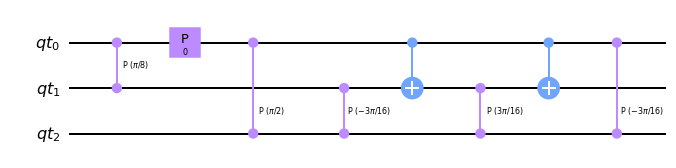

In [32]:
at = 0
bt = np.pi/2
ct = np.pi/8
dt = np.pi/4

qt = QuantumRegister(3, 'qt')
qct = QuantumCircuit(qt)

qct.cp(ct - at, qt[0], qt[1])
qct.p(at, qt[0])
qct.cp(bt - at, qt[0], qt[2])

qct.cp((dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp(-(dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp((dt - ct + at - bt)/2, qt[0], qt[2])


qct.draw('mpl')

#### **Unitary_Simulator**

In [29]:
backend_unitary_t = Aer.get_backend('unitary_simulator')
job_unitary_t = execute(qct, backend_unitary_t, shots=8192)
count_unitary_t = job_unitary_t.result().get_unitary()
array_to_latex(count_unitary_t, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

See the unitary matrix we are getting above is not exactly like
$$
\begin{bmatrix}
                    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
                    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
                    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
                    0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
                    0 & 0 & 0 & 0 & e^{ia} & 0 & 0 & 0\\
                    0 & 0 & 0 & 0 & 0 & e^{ib} & 0 & 0\\
                    0 & 0 & 0 & 0 & 0 & 0 & e^{ic} & 0\\
                    0 & 0 & 0 & 0 & 0 & 0 & 0 & e^{id}
                    \end{bmatrix}
$$
but kind of rearranged version of this. Though the matrix we are getting and the $CU_{j}$ matrix is mathematically same. This is because **Qiskit** interpret the tensor product from bottom qubit to top qubit. So to get exactly same form as the $CU_{j}$, we have to make the circuit inverted.

Lets see the inverted circuit

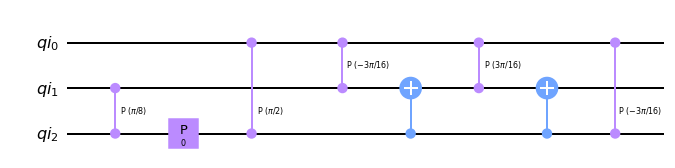

In [30]:
ai = 0
bi = np.pi/2
ci = np.pi/8
di = np.pi/4

qi = QuantumRegister(3, 'qi')
qci = QuantumCircuit(qi)


qci.cp(ci - ai, qi[2], qi[1])
qci.p(ai, qi[2])
qci.cp(bi - ai, qi[2], qi[0])

qci.cp((di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp(-(di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp((di - ci + ai - bi)/2, qi[2], qi[0])


qci.draw('mpl')

#### **Unitary_Simulator**

In [31]:
backend_unitary_i = Aer.get_backend('unitary_simulator')
job_unitary_i = execute(qci, backend_unitary_i, shots=8192)
count_unitary_i = job_unitary_i.result().get_unitary()
array_to_latex(count_unitary_i, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

Now this looks a lot like $U_{j}$ matrix. So both the version, we just have to pay attention to $QFT$ part, depending on which version we used.

### **Circuit** <a id="circuit"></a>
---

Now lets build the whole circuit part by part by unitaries and by eigenstates.

In [18]:
# Lets import all the necessary libraries

import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.widgets import plot_bloch_vector_spherical
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import array_to_latex

Creating a function to create $CU_{j}$

In [4]:
def controlled_unitary(qc, unit, eigen, x, y, z, a, b, c, d): # x,y,z = Specific Qubit; a,b,c,d = Phases
    qc.cp(c-a, x, y) # controlled-U1(c-a)
    qc.p(a, x) # U1(a)
    qc.cp(b-a, x,z) # controlled-U1(b-a)
    
    # controlled controlled U1(d-c+a-b)
    qc.cp((d-c+a-b)/2, y, z)
    qc.cx(x, y)
    qc.cp(-(d-c+a-b)/2, y, z)
    qc.cx(x, y)
    qc.cp((d-c+a-b)/2, x, z)
    
    qc.barrier()
    return qc

Now make the $U\ =\ U_{1}\ \otimes\ U_{2}\ \otimes\ U_{3}\ \otimes\ U_{4}$

In [5]:
def U(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l): # a,b,c = phases for U1; d,e,f = phases for U2; g,h,i = phases for U3; j,k,l = phases for U4
    controlled_unitary(qc, unit, eigen, m, n, o, 0, a, b, c)
    controlled_unitary(qc, unit, eigen, m, p, q, d, 0, e, f)
    controlled_unitary(qc, unit, eigen, m, r, s, g, h, 0, i)
    controlled_unitary(qc, unit, eigen, m, t, u, j, k, l, 0)

Now lets make final $CU$

In [6]:
def final_U(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l):
    U(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)

$CU^{2}$

In [7]:
def final_U2(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l):
    final_U(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)
    final_U(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)

$CU^{4}$

In [8]:
def final_U4(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l):
    final_U2(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)
    final_U2(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)

$CU^{8}$

In [9]:
def final_U8(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l):
    final_U4(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)
    final_U4(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)

$CU^{16}$

In [10]:
def final_U16(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l):
    final_U8(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)
    final_U8(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)

$CU^{32}$

In [11]:
def final_U32(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l):
    final_U16(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)
    final_U16(qc, unit, eigen, m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l)

Lets consider all the **phases**:

The phases are normalized to be bound within $[0,\ 2π]$ once we know the range of distances between the cities.

$$\phi_{1\to1}\ =\ 0\\
\phi_{2\to1}\ =\ a\ =\ \frac{\pi}{2}\\
\phi_{3\to1}\ =\ b\ =\ \frac{\pi}{8}\\
\phi_{4\to1}\ =\ c\ =\ \frac{\pi}{4}\\
---\\
\phi_{1\to2}\ =\ d\ =\ \frac{\pi}{2}\\
\phi_{2\to2}\ =\ 0\\
\phi_{3\to2}\ =\ e\ =\ \frac{\pi}{4}\\
\phi_{4\to2}\ =\ f\ =\ \frac{\pi}{4}\\
---\\
\phi_{1\to3}\ =\ g\ =\ \frac{\pi}{8}\\
\phi_{2\to3}\ =\ h\ =\ \frac{\pi}{4}\\
\phi_{3\to3}\ =\ 0\\
\phi_{4\to3}\ =\ i\ =\ \frac{\pi}{8}\\
---\\
\phi_{1\to4}\ =\ j\ =\ \frac{\pi}{4}\\
\phi_{2\to4}\ =\ k\ =\ \frac{\pi}{4}\\
\phi_{3\to4}\ =\ l\ =\ \frac{\pi}{8}\\
\phi_{4\to4}\ =\ 0\\
$$


In [12]:
a = np.pi / 2
b = np.pi / 8
c = np.pi / 4
d = np.pi / 2
e = np.pi / 4
f = np.pi / 4
g = np.pi / 8
h = np.pi / 4
i = np.pi / 8
j = np.pi / 4
k = np.pi / 4
l = np.pi / 8

Building the eigenstates

In [13]:
# Storing the eigenvalues in a list
eigen_values = ["11000110", "10001101", "11001001"]

# Function to place appropriate corresponding gate according to eigenstates
def eigenstates(qc, eigen, index):
    print(eigen_values[index])
    for i in range(0, len(eigen)):
        if eigen_values[index][i] == '1':
            qc.x(eigen[i])
        if eigen_values[index][i] == '0':
            pass
    qc.barrier()
    return qc

Building the circuit

In [20]:
#--------- Initialization --------------------------------------
unit = QuantumRegister(6, 'unit')
eigen = QuantumRegister(8, 'eigen')
unit_classical = ClassicalRegister(6, 'unit_classical')
qc = QuantumCircuit(unit, eigen, unit_classical)
#---------------------------------------------------------------

#----------- Setting one eigenstates ---------------------------
eigenstates(qc, eigen, 0)
#---------------------------------------------------------------

#---------- Hadamard on the 'unit' qubits ----------------------
for i in range(6):
    qc.h(unit[i])
qc.barrier()
#---------------------------------------------------------------

#------------- Controlled Unitary ------------------------------ 
final_U (qc, unit, eigen, unit[5] , eigen[0] , eigen[1] , eigen[2] , eigen[3] , eigen[4] , eigen[5] , eigen[6] , eigen[7],
         a, b, c, d, e, f, g, h, i, j, k, l)
final_U2 (qc, unit, eigen, unit[4] , eigen[0] , eigen[1] , eigen[2] , eigen[3] , eigen[4] , eigen[5] , eigen[6] , eigen[7],
         a, b, c, d, e, f, g, h, i, j, k, l)
final_U4 (qc, unit, eigen, unit[3] , eigen[0] , eigen[1] , eigen[2] , eigen[3] , eigen[4] , eigen[5] , eigen[6] , eigen[7],
         a, b, c, d, e, f, g, h, i, j, k, l)
final_U8 (qc, unit, eigen, unit[2] , eigen[0] , eigen[1] , eigen[2] , eigen[3] , eigen[4] , eigen[5] , eigen[6] , eigen[7],
         a, b, c, d, e, f, g, h, i, j, k, l)
final_U16 (qc, unit, eigen, unit[1] , eigen[0] , eigen[1] , eigen[2] , eigen[3] , eigen[4] , eigen[5] , eigen[6] , eigen[7],
         a, b, c, d, e, f, g, h, i, j, k, l)
final_U32 (qc, unit, eigen, unit[0] , eigen[0] , eigen[1] , eigen[2] , eigen[3] , eigen[4] , eigen[5] , eigen[6] , eigen[7],
         a, b, c, d, e, f, g, h, i, j, k, l)
#---------------------------------------------------------------

#-------------- Inverse QFT ------------------------------------
qc.h(unit[0])

qc.cp(-np.pi/2, unit[0], unit[1])

qc.h(unit[1])

qc.cp(-np.pi/4, unit[0], unit[2])
qc.cp(-np.pi/2, unit[1], unit[2])

qc.h(unit[2])

qc.cp(-np.pi/8, unit[0], unit[3])
qc.cp(-np.pi/4, unit[1], unit[3])
qc.cp(-np.pi/2, unit[2], unit[3])

qc.h(unit[3])

qc.cp(-np.pi/16, unit[0], unit[4])
qc.cp(-np.pi/8, unit[1], unit[4])
qc.cp(-np.pi/4, unit[2], unit[4])
qc.cp(-np.pi/2, unit[3], unit[4])

qc.h(unit[4])

qc.cp(-np.pi/32, unit[0], unit[5])
qc.cp(-np.pi/16, unit[1], unit[5])
qc.cp(-np.pi/8, unit[2], unit[5])
qc.cp(-np.pi/4, unit[3], unit[5])
qc.cp(-np.pi/2, unit[4], unit[5])

qc.h(unit[5])
#---------------------------------------------------------------

# --------- Measure --------------------------------------------
qc.measure(unit, unit_classical)
#---------------------------------------------------------------

# --------- Draw -----------------------------------------------
#qc.draw('mpl')
print(qc)

11000110
                        ░ ┌───┐ ░                                            »
          unit_0: ──────░─┤ H ├─░────────────────────────────────────────────»
                        ░ ├───┤ ░                                            »
          unit_1: ──────░─┤ H ├─░────────────────────────────────────────────»
                        ░ ├───┤ ░                                            »
          unit_2: ──────░─┤ H ├─░────────────────────────────────────────────»
                        ░ ├───┤ ░                                            »
          unit_3: ──────░─┤ H ├─░────────────────────────────────────────────»
                        ░ ├───┤ ░                                            »
          unit_4: ──────░─┤ H ├─░────────────────────────────────────────────»
                        ░ ├───┤ ░          ┌──────┐                          »
          unit_5: ──────░─┤ H ├─░──■───────┤ P(0) ├─■─────────────────────■──»
                  ┌───┐ ░ └───┘ ░  │P(π/8) 

#### **QASM_Simulator** <a id="qasm_simulator"></a>

{'100100': 8192}


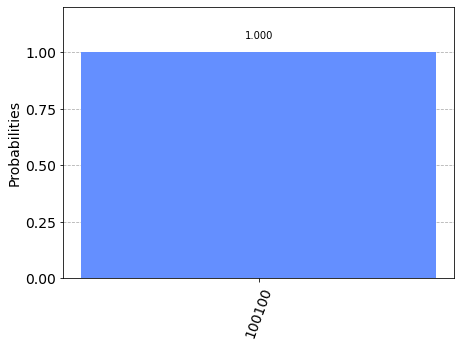

In [15]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)

#### **Statevector_Simulator** <a id="statevector_simulator"></a>

In [16]:
backend_state = Aer.get_backend('statevector_simulator')
job_state = execute(qc, backend_state, shots=8192)
count_state = job_state.result().get_statevector()
print(count_state)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


### **Conclusion** <a id="conclusion"></a>
---

**Firstly**, this process is not complete yet. We only used the first eigenstates $|11000110\rangle$ here, this process has to be done for all the eigenstates to find the total distance for all the route. After that, use **quantum search algorithm** to find the minimum of those distances. This means, the time required scales with the number of eigenstates.

**Secondly**, the $paper^{[1]}$ we took the reference for this has many mistakes for the circuit. We fixed it and used the improved version.

**Thirdly**, Now that we have went theough the theory, concept and build the circuit, lets discuss-
**Does using this process of quantum phase estimation to solve a problem of $NP-Hard$ gives a algorithm/way to solve these kind of problems more efficiently and optimally or in other word Is this a perfect solution ?**
The answer is **No**. This process of using phase estimation, which encode the cost as phases is one of the many ways to solve these category of problems. But these approach is also **not perfect**. **Perfect** in the sense, it does not give any efficient algorithm to solve these (**NP-Hard**) problems in polynomial time.
In this process, we find all the possible **Hamiltonian cycle** in the graph and based on those cycle we calculated the total cost. But, keep in mind, **Finding all Hamiltonian cycle of a graph is itself a NP-Complete problem**. So we gave precomputed Hamiltonian cycle in the beginning to get the eigenstates. We used $4$ nodes/city, but for large number of cities say 10,000, finding all possible Hamiltonian cycle is tedious job.

### **Appendix** <a id="appendix"></a>
---

Terms used in the notebook:

**1. turing machine**: Invented by Alan Turing, a Turing machine is a mathematical model of computation that defines an abstract machine that manipulates symbols on a strip of tape which can move left and right, according to a table of rules.
A Turing machine will **definitely halt** if any transition function is not defined. 
A Turing machine **may or may not halt (goes to infinite loop)**, if any string is not accepted. 
A Turing machine will **definitely halt, it it accepts the string**.
> **Turing Thesis**: Any computation that can be carried out by mechanical means can be performed by someturing machine.

**2. computability**: If there exists an algorithm or a turing machine which takes a function as input and going to halt on every input given, then that function is **computable**.

**3. decidability**: If for a problem, there exists an algorithm or a turing machine which will take any input from domain of the function and say either 'yes' or 'no', then that function is **decidable**.
This give rise to 2 category of **problems** - **Decidable** and **Undecidable**.
Some of the famous undecidable problems are- 
**TM State Entry Problem -> TM Halting Problem -> Post correspondence Problem -> Ambiguity Problem** etc.

**4. decidable problems**:
> **tractable**: If there exists atleast one polynomial time algorithm to solve it.
$$
                                    O(n^k),\   k \ge 0
$$

> **intractable**: A problem that cannot be solved by a polynomial time algorithm.
$$
                                    O(c^n),\   c = constant
$$

**5. decision problem**: Given a problem with conditions, is it solvable- 'Yes' or 'No'.
If 'Yes', the problem is easy and we will find an **optimal** solution for that problem.
If 'No', then we cannot solve any solution for that problem.
If the decision problem is **hard**, then the **optimization problem** is hard.
If the **optimization problem** is **easy (solve in polynomial time)**, then the **decision problem** is easy. But for this we need **verification algorithm**.
> **verification algorithm**: Any algorithm which verifies whether a decision problem is right or wrong using a solution.

**6. complexity class**: There exists 2 complexity classes-
> **P**: Set of all decision problem for which there is a **polynomial time algorithm to solve them**.

> **NP**: Set of all decision problem for which there is a **polynomial time algorithm to verifies them**.

Every **P** class problem can be **solved** in polynomial time, which in turn can **verify** in polynomial time.

> **NP-Hard**: If every problem in NP is **polynomial time reducible** to a problem 'A', then 'A' is called NP-Hard.

> **NP-Complete**: A problem is in NP-complete it it is both NP and NP-Hard.

If **NP-Hard** or **NP-Complete** is **solvable** in polynomial time, then $NP = P$.

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a0/P_np_np-complete_np-hard.svg">

In terms of turing machine-
> **P**: A problem is set to be **P**, if it is accepted by **deterministic turing machine** in polynomial time.

> **NP**: A problem is set to be **NP**, if it solved by **non-deterministic turing machine** in polynomial time.

**7. combinatorial optimization**: Combinatorial optimization is a topic that consists of finding an optimal object from a finite set of objects. In many such problems, exhaustive search is not tractable. It operates on the domain of those optimization problems in which the set of feasible solutions is discrete or can be reduced to discrete, and in which the goal is to find the best solution. 
Typical problems are the **Travelling Salesman Problem ("TSP")**, **Minimum Spanning Tree Problem ("MST")**, and **0-1 Knapsack Problem**.
> **NOTE**: To learn learn about optimization, link to "[combinatorial optimization](https://en.wikipedia.org/wiki/Combinatorial_optimization)" wikipedia page.

**8. hamiltonian path**: A Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. 

**9. hamiltonian cycle**: A Hamiltonian cycle (or Hamiltonian circuit) is a Hamiltonian path that is a cycle or in other words there is an edge (in the graph) from the last vertex to the first vertex of the Hamiltonian Path. 
Determining whether such paths and cycles exist in graphs is the Hamiltonian path problem, which is **NP-complete**.

**10. traveller purchaser problem**: 
> **Given a list of marketplaces, the cost of travelling between different marketplaces, and a list of available goods together with the price of each such good at each marketplace, the task is to find, for a given list of articles, the route with the minimum combined cost of purchases and travelling.**

**11. vehicle routing problem**:
> **What is the optimal set of routes for a fleet of vehicles to traverse in order to deliver to a given set of customers?**

**12. complete graph**: Every vertex is connected to every other vertices via edges or each pair of graph vertices is connected by an edge. The complete graph with $n$ graph vertices has $\frac{n(n-1)}{2}$ undirected edges.

### **References** <a id="references"></a>
---

This notebook/writing is based on:

> [1]. Karthik Srinivasan, Saipriya Satyajit, Bikash K Behera, and Prasanta K Panigrahi. [Efficient quantum algorithm for solving travelling salesman problem: An IBM quantum experience](https://arxiv.org/abs/1805.10928). *arXiv:1805.10928v1, 2018*.

> [2]. Adriano Barenco, Charles H. Bennett, Richard Cleve, David P. DiVincenzo, Norman Margolus, Peter Shor, Tycho Sleator, John Smolin, Harald Weinfurter. [Elementary gates for quantum computation](https://arxiv.org/abs/quant-ph/9503016). *arXiv:9503016v1, 1995*.


### **Version Information** <a id="version_information"></a>

In [15]:
%qiskit_version_table